Carregar conjunto de dados

Vamos primeiro carregar o conjunto de dados HR necessário usando a função read CSV do pandas. Você pode baixar os dados no seguinte link : 

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
%matplotlib inline

# Carregar dados
data=pd.read_csv('ds_salaries.csv')

data.head()
 

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


“tail()” retorna as últimas cinco observações.

In [103]:
data.tail()
 

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


Depois de carregar o conjunto de dados, talvez você queira saber um pouco mais sobre ele. Você pode verificar nomes de atributos e tipos de dados usando info().

In [104]:
data.info() 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


No conjunto de dados fornecido, você varios tipos de funcionários, por exemplo o FT e o CT. Assim, você pode dividir os dados em grupos e comparar suas características. Aqui, você pode encontrar a média dos grupos usando as funções groupby() e mean().

In [105]:
left = data.groupby('experience_level')
left.mean()
 

C:\Users\fabio\AppData\Local\Temp\ipykernel_11060\3569584339.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  left.mean()


,work_year,salary,salary_in_usd,remote_ratio
experience_level,,,,
EN,2022.053125,188381.178125,78546.284375,55.156250
EX,2022.385965,246802.201754,194930.929825,48.245614
MI,2022.203727,248200.306832,104525.939130,46.211180
SE,2022.468203,170048.965421,153051.071542,45.071542


In [106]:
left = data.groupby('job_title')
left.mean()
 

C:\Users\fabio\AppData\Local\Temp\ipykernel_11060\4083877169.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  left.mean()


,work_year,salary,salary_in_usd,remote_ratio
job_title,,,,
3D Computer Vision Researcher,2021.500000,120000.000000,21352.250000,50.000000
AI Developer,2022.727273,137181.818182,136666.090909,31.818182
AI Programmer,2022.500000,55000.000000,55000.000000,50.000000
AI Scientist,2021.687500,275312.500000,110120.875000,71.875000
Analytics Engineer,2022.446602,151352.621359,152368.631068,54.368932
...,...,...,...,...
Research Engineer,2022.864865,162752.810811,163108.378378,18.918919
Research Scientist,2022.500000,160768.890244,161214.195122,27.439024
Software Data Engineer,2023.000000,75000.000000,62510.000000,75.000000


A função describe() em pandas é muito útil para obter várias estatísticas resumidas. Essa função retorna a contagem, média, desvio padrão, valores mínimo e máximo e os quantis dos dados.

In [107]:
data.describe()
 

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


Gráfico de barras para contar o número de funcionários implantados em job_title

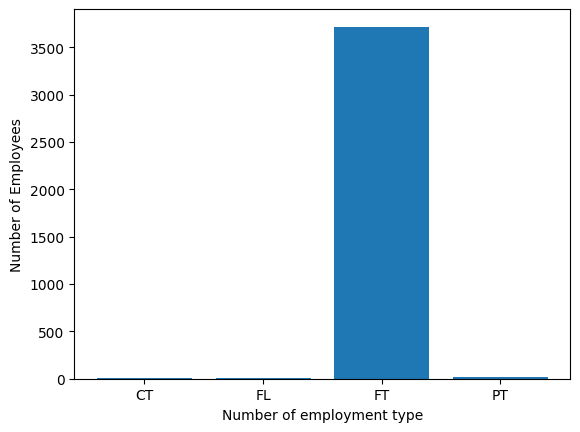

In [108]:
num_projects=data.groupby('employment_type').count()
plt.bar(num_projects.index.values, num_projects['salary_in_usd'])
plt.xlabel('Number of employment type')
plt.ylabel('Number of Employees')
plt.show()
 

Subtramas usando Seaborn
É assim que você pode analisar os recursos um por um, mas será demorado. A melhor opção é usar a biblioteca Seaborn e plotar todos os gráficos em uma única execução usando subplots.

C:\Users\fabio\AppData\Local\Temp\ipykernel_11060\1767945058.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)


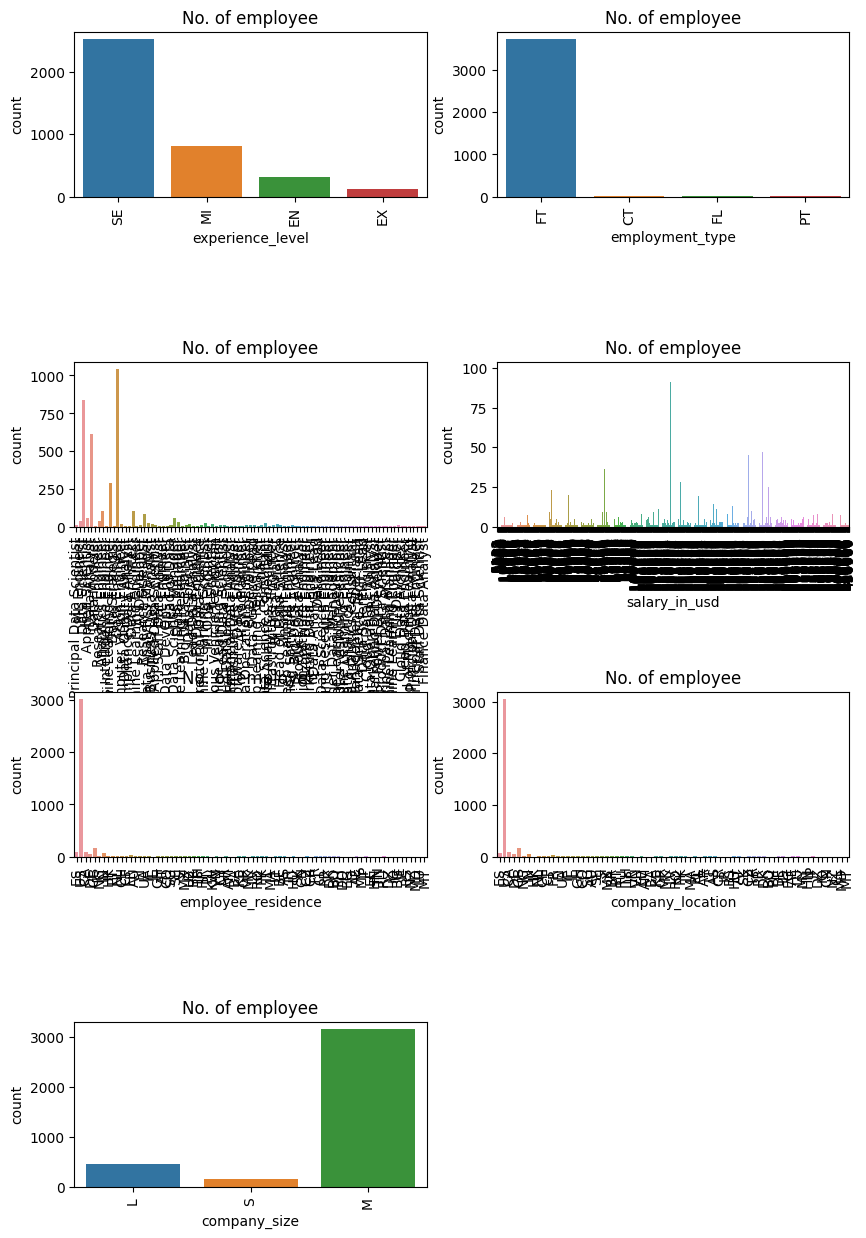

In [109]:
features=['experience_level','employment_type','job_title','salary_in_usd', 'employee_residence','company_location','company_size']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
     plt.subplot(4, 2, i+1)
     plt.subplots_adjust(hspace = 1.0)
     sns.countplot(x=j,data = data)
     plt.xticks(rotation=90)
     plt.title("No. of employee")
  

Pré-processamento: codificação de rótulo

Muitos algoritmos de aprendizado de máquina exigem dados de entrada numéricos, portanto, você precisa representar colunas categóricas em uma coluna numérica. Para codificar esses dados, você pode mapear cada valor para um número. por exemplo, o valor da coluna Salário pode ser representado como baixo:0, médio:1 e alto:2. Esse processo é conhecido como codificação de rótulo. No sklearn, podemos fazer isso usando LabelEncoder.

In [110]:
# Import LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data['experience_level']=le.fit_transform(data['experience_level'])
data['employment_type']=le.fit_transform(data['employment_type'])
data['job_title']=le.fit_transform(data['job_title'])
data['salary_currency']=le.fit_transform(data['salary_currency'])
data['employee_residence']=le.fit_transform(data['employee_residence'])
data['company_location']=le.fit_transform(data['company_location'])
data['company_size']=le.fit_transform(data['company_size'])

#rotulos

print("experience_level:", le.classes_)
print("employment_type:", le.classes_)
print("job_title:", le.classes_)
print("salary_currency:", le.classes_)
print("employee_residence:", le.classes_)
print("company_location:", le.classes_)
print("company_size:", le.classes_)

 

experience_level: ['L' 'M' 'S']
employment_type: ['L' 'M' 'S']
job_title: ['L' 'M' 'S']
salary_currency: ['L' 'M' 'S']
employee_residence: ['L' 'M' 'S']
company_location: ['L' 'M' 'S']
company_size: ['L' 'M' 'S']


Aqui, importamos o módulo de pré-processamento e criamos o objeto Label Encoder. Usando este objeto LabelEncoder você ajusta e transforma a coluna “salário” e “Departamentos” na coluna numérica.

Dividir o conjunto de dados

Para avaliar o desempenho do modelo, precisamos dividir o conjunto de dados em um conjunto de treinamento e um conjunto de teste. Vamos dividir o conjunto de dados usando a função train_test_split(). você precisa passar basicamente 3 recursos de parâmetros, destino e tamanho test_set. 

In [111]:
# Spliting data into Feature and
#X=data[['work_year','experience_level', 'job_title','salary','salary_currency', 'salary_in_usd', 'employee_residence','remote_ratio', 'company_location', 'company_size']]
X=data[['work_year','experience_level', 'employment_type', 'job_title','salary','salary_currency', 'employee_residence','remote_ratio', 'company_location', 'company_size']]
#y=data['experience_level']
y=data['salary_in_usd']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test
 

Construir modelo de classificação

Vamos construir um modelo de previsão de rotatividade de funcionários. Aqui, nosso objetivo é prever o churn usando o MLPClassifier.

Primeiro, importe o módulo MLPClassifier e crie o objeto MLP Classifier usando a função MLPClassifier(). Em seguida, ajuste seu modelo no conjunto de treinamento usando fit() e execute a previsão no conjunto de teste usando predict().

In [112]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)
 

Iteration 1, loss = 35.77395256
Iteration 2, loss = 35.55651754
Iteration 3, loss = 35.51084007
Iteration 4, loss = 35.44524243
Iteration 5, loss = 27.42879867
Iteration 6, loss = 6.69055970
Iteration 7, loss = 6.65938488
Iteration 8, loss = 6.62147208
Iteration 9, loss = 6.58447903
Iteration 10, loss = 6.54851689
Iteration 11, loss = 6.51540234
Iteration 12, loss = 6.48351388
Iteration 13, loss = 6.45367510
Iteration 14, loss = 6.42505859
Iteration 15, loss = 6.39779810
Iteration 16, loss = 6.37178954
Iteration 17, loss = 6.34661036
Iteration 18, loss = 6.32246705
Iteration 19, loss = 6.29937120
Iteration 20, loss = 6.27729385
Iteration 21, loss = 6.25613270
Iteration 22, loss = 8.46475689
Iteration 23, loss = 6.21706116
Iteration 24, loss = 6.19854212
Iteration 25, loss = 6.18033009
Iteration 26, loss = 6.16240423
Iteration 27, loss = 6.14496886
Iteration 28, loss = 6.12784391
Iteration 29, loss = 6.11206632
Iteration 30, loss = 6.11150373
Iteration 31, loss = 6.08230141
Iteration 32

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

Parâmetros:

hidden_layer_sizes: é uma tupla onde cada elemento representa uma camada e seu valor representa o número de neurônios em cada camada oculta.
learning_rate_init: Usado para controlar o tamanho do passo na atualização dos pesos. 
ativação: Função de ativação da camada oculta. Exemplos, identidade, logística, tanh e relu. por padrão, relu é usado como uma função de ativação.
random_state: Define o número aleatório para pesos e inicialização de bias. 
detalhado: usado para imprimir mensagens de progresso na saída padrão.

Faça previsões e avalie o modelo

Nesta seção, faremos previsões sobre o conjunto de dados de teste e avaliaremos a precisão do modelo com base nos rótulos reais disponíveis do conjunto de dados de teste. 

In [113]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score 

# Calcuate accuracy
accuracy_score(y_test,ypred)
 

0.030168589174800354

Continuação

In [114]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [117]:
# 2. Pré-processamento dos dados
# scaler = StandardScaler()
# data['salary_in_usd'] = scaler.fit_transform(data[['salary_in_usd']])

# Selecionar as colunas relevantes para a previsão
#features = ['work_year', 'experience_level', 'employment_type', 'job_title']
features = ['work_year','experience_level', 'employment_type', 'job_title','salary','salary_currency', 'employee_residence','remote_ratio', 'company_location', 'company_size']
target = 'salary_in_usd'
df = data[features + [target]]

# Dividir o dataset em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Normalizar os dados de entrada
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Construir o modelo MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print('Acurácia do modelo:', score)

# Exemplo: Prever um salário em USD com base no perfil de um profissional
#profile = [[2023, 2, 1, 3, 2, 1, 3, 2, 1, 3]]  # Perfil do profissional
profile = [[2023,1,1,3,25500,1,1,100,1,2]]  # Perfil do profissional
profile = scaler.transform(profile)  # Normalizar o perfil

predicted_salary = model.predict(profile)
print('Salário previsto em USD:', predicted_salary[0])

Acurácia do modelo: 0.2611822841780821


c:\Users\fabio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fabio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 11 features, but StandardScaler is expecting 10 features as input.